# Movie Recommender System

### * Content Based Filtering
#### Netflix, Prime -> Recommendation on what movie/series a person has watched

### * Collaborative Filtering
#### Amazon -> Suppose a phone is bought. Recommendations on compatible accessories like case and earphones will be shown

### In this project, the user will be recommended a movie similar to the previous movie that he has watched and the user ratings of the other movies

#### Tools used is only Python with Pandas and Numpy

In [1]:
import numpy as np
import pandas as pd

### Get the data

In [4]:
col_names = ['user_id', 'item_id', 'rating','timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=col_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Get movie titles

In [8]:
movie_titles = pd.read_csv("movie_id_titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merge them together

In [9]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


### Some Exploratory Data Analysis
#### Check the best-rated movies in the dataset
### Visualization Imports

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

### Create a Dataframe with average ratings and number of ratings
#### Dataframe of movies with highest average rating

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

#### Dataframe of movies with maximum number ratings

In [22]:
ratings_count = pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=False).head())
ratings_count.head()

,rating
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


#### Dataframe of average ratings of all movies

In [30]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#### Merge average rating of all movies and the number of user ratings

In [31]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


### A few histograms

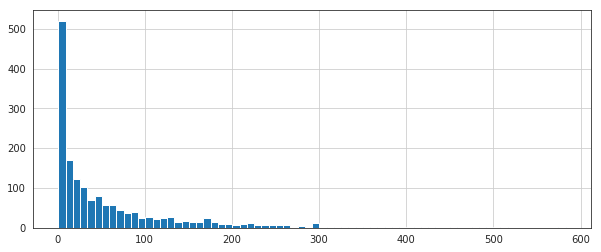

In [36]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

#### The plot shows that over 500 movies have 0 or no ratings

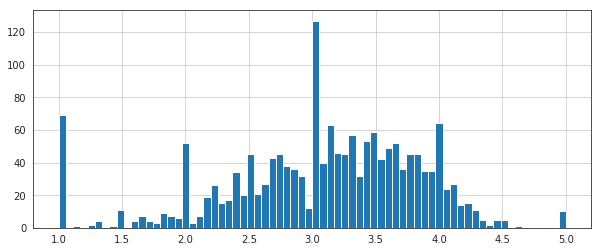

In [37]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

#### This plot shows that the maximum ratings are in the range 3.0 to 4.0. Many also have given the rating as 1. However the histogram follows the usual Gaussian distribution

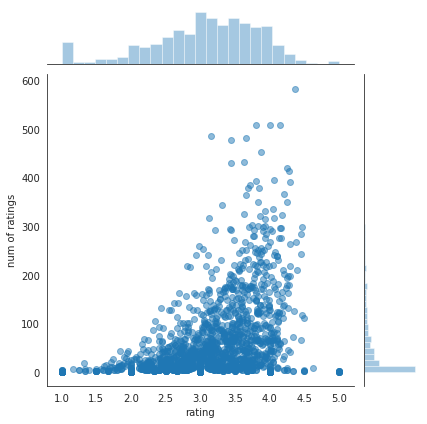

In [38]:
sns.jointplot(x='rating',y='num of ratings', data=ratings,alpha=0.5)

#### A jointplot gives a combination of a scatter plot and a histogram. The portion which has the maximum density of points has the maximum ratings. This is also reflected on the histogram on top of the scatter plot. 

### Recommending similar movies
#### Lets create a matrix to see what each particular user has given rating to each movie

In [39]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


#### The value 'NaN' indicates there is no rating for that particular movie for that particular user. This can also mean that the user has not seen the movie

In [43]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


#### check user rating for liar liar

In [45]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']
liarliar_user_ratings.head()

user_id
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
Name: Liar Liar (1997), dtype: float64

#### Find correlation between two pandas series

In [46]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/home/bro/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/bro/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


#### Clean this by removing NaN values

In [47]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


#### Higher the correlation value, the more similar the movie is to Liar Liar

### Lets sort the Dataframe to get the movie with maximum similarity to Liar Liar

In [50]:
corr_liarliar.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


#### However we will consider the movies which has more than 100 ratings. It was evident from the histogram from earlier.

In [51]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [54]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
